In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("gold_price_data.csv")

In [ ]:
print(df.head())
print(df.describe())
print(df.info())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.4800

In [ ]:
numeric_df = df.drop(columns=['Date']) if 'Date' in df.columns else df

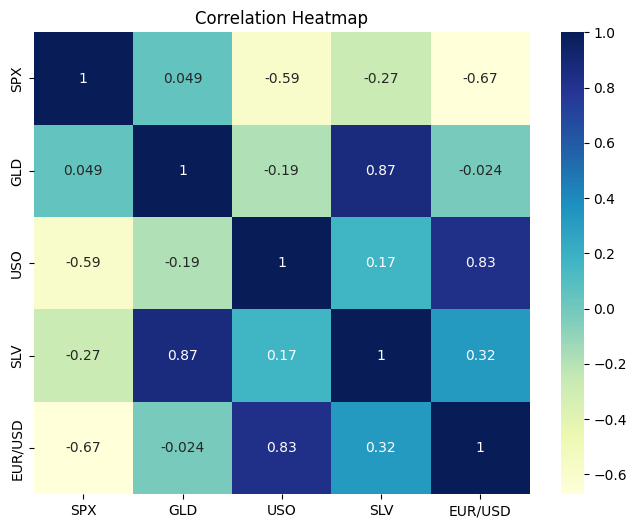

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
if 'Date' in df.columns:
    df = df.drop('Date', axis=1)

In [ ]:
X = df.drop('GLD', axis=1)
y = df['GLD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE     : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

In [ ]:
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


Model: Random Forest
R² Score: 0.9900
MAE     : 1.2356
RMSE    : 2.3387

Model: XGBoost
R² Score: 0.9884
MAE     : 1.4555
RMSE    : 2.5237


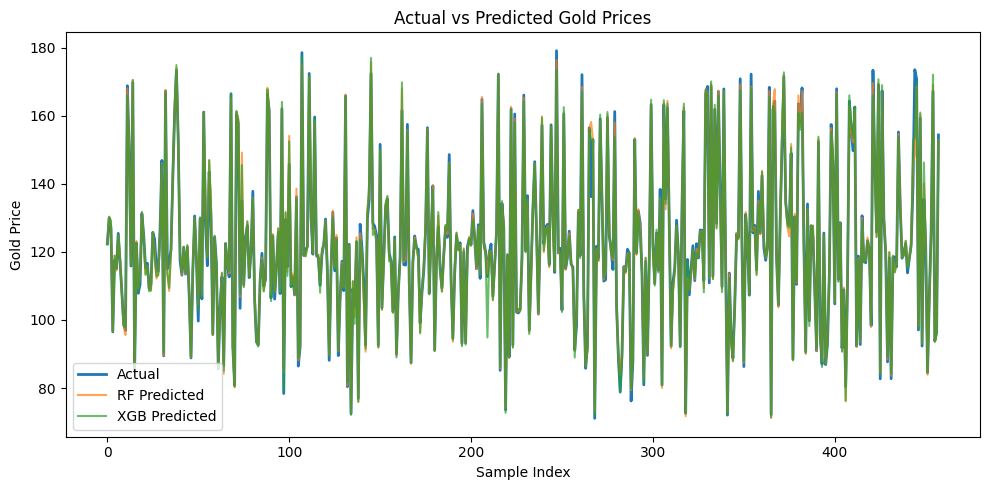

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(rf_preds, label="RF Predicted", alpha=0.7)
plt.plot(xgb_preds, label="XGB Predicted", alpha=0.7)
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Sample Index")
plt.ylabel("Gold Price")
plt.legend()
plt.tight_layout()
plt.show()

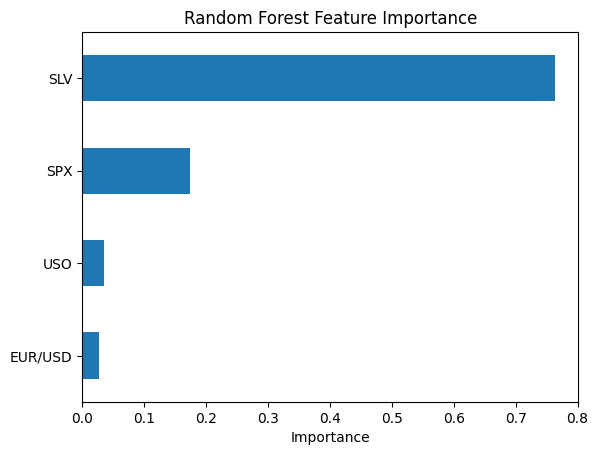

In [ ]:
rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_importance.sort_values().plot(kind='barh', title='Random Forest Feature Importance')
plt.xlabel("Importance")
plt.show()

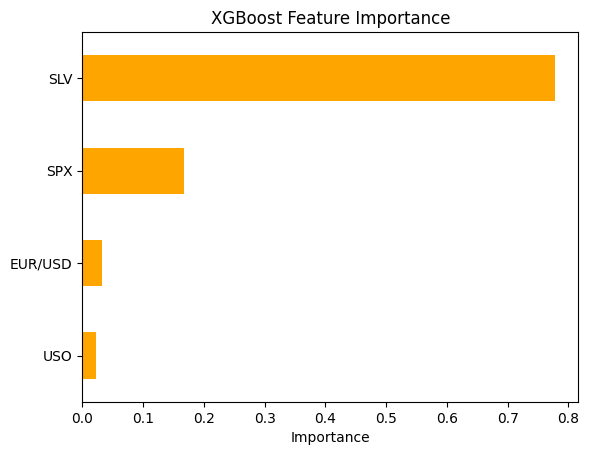

In [ ]:
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importance.sort_values().plot(kind='barh', title='XGBoost Feature Importance', color='orange')
plt.xlabel("Importance")
plt.show()